# 載入套件與資料集

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# Data Preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Data Preprocessing

In [3]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# 讀取資料
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# 將資料標準化
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

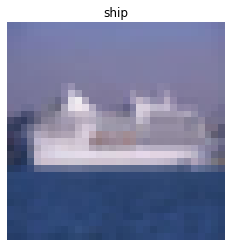

In [5]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

# 建立用於分類 CIFAR 10 的卷積神經網路

## LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

## 將參數設為32,128,512

In [25]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [26]:
model = Sequential(CNN_layers+FC_layers)
model.summary()
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

# 訓練模型: 透過訓練來學習分類資料的函數

In [19]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=3,
          validation_data=(X_test, y_test)
          )
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

# save model
model.save_weights('LeNet5_CIFAR10_HW.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 186s 4ms/sample - loss: 1.8000 - categorical_accuracy: 0.3213 - val_loss: 1.5612 - val_categorical_accuracy: 0.4162
Epoch 2/3
50000/50000 [==============================] - 177s 4ms/sample - loss: 1.4563 - categorical_accuracy: 0.4622 - val_loss: 1.3229 - val_categorical_accuracy: 0.5144
Epoch 3/3
50000/50000 [==============================] - 178s 4ms/sample - loss: 1.2855 - categorical_accuracy: 0.5292 - val_loss: 1.2999 - val_categorical_accuracy: 0.5273
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2

# 模型預測

In [28]:
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Accuracy: 9.826000034809113
Test Accuracy: 9.790000319480896


# 遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [30]:
# Load MNIST
(U_train, v_train0), (U_test, v_test0) = datasets.mnist.load_data()
# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 10)
v_test = to_categorical(v_test0, 10)

In [31]:
# MNIST 的圖片大小是 28x28，為黑白圖片所以只有1個 chanel，所以在此重新設定 CNN layer
# 參數改為32,64,128
CNN_layers = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [32]:
model_MNIST = Sequential(CNN_layers+FC_layers)

ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 512 but received input with shape [None, 128]